In [4]:
import pandas as pd
from pybaseball import *
from scipy.stats import pearsonr

data = pd.read_csv("data.csv")

/home/cm/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data = data.loc[data['inning'] <= 9]
data = data.drop(data.columns[0], axis=1)

In [6]:
data.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
0,SL,2015-11-01,85.2,-1.8461,6.1603,Kelvin Herrera,518595.0,516969.0,field_out,hit_into_play,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Standard,Standard
1,FF,2015-11-01,97.7,-1.6600,6.1500,Kelvin Herrera,446263.0,516969.0,field_out,hit_into_play,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Infield shift,Strategic
2,FT,2015-11-01,96.2,-1.9189,6.1301,Kelvin Herrera,501571.0,516969.0,field_out,hit_into_play,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Standard,Standard
3,SI,2015-11-01,97.1,-1.1903,6.2683,Jeurys Familia,460086.0,544727.0,field_out,hit_into_play,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Standard,Strategic
4,SI,2015-11-01,96.7,-1.2267,6.3665,Jeurys Familia,521692.0,544727.0,field_out,hit_into_play_score,...,2.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,Strategic,Standard


In [7]:
data['events'].unique()

array(['field_out', 'double', 'strikeout', 'grounded_into_double_play',
       'single', 'field_error', 'force_out', 'home_run', 'double_play',
       'strikeout_double_play', 'fielders_choice', 'triple',
       'fielders_choice_out', 'catcher_interf', 'other_out',
       'triple_play'], dtype=object)

In [8]:
events = ['field_out', 'double', 'strikeout',
       'grounded_into_double_play', 'single', 'field_error',
       'force_out', 'home_run', 'double_play', 'strikeout_double_play',
       'fielders_choice', 'triple', 'fielders_choice_out', 'catcher_interf', 'other_out', 'triple_play']


In [9]:
batter = data.groupby(['batter', 'game_year', 'inning']).count()
batter = batter[['pitch_type']]

In [10]:
batter = batter.reset_index()

In [11]:
batter = batter.groupby(['batter', 'game_year']).agg({'pitch_type':'sum'})
batter = batter.rename(index=str, columns={"pitch_type": "AB"})

In [12]:
batter.head()

AB
batter   game_year    
112526.0 2015.0     58
         2016.0     60
         2017.0     19
         2018.0      4
115629.0 2015.0      1

In [13]:
hits_data = data[data['events'].isin(['single', 'double', 'triple', 'home_run'])]
hits_data.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
6,FF,2015-11-01,94.8,-1.3516,6.1937,Matt Harvey,543333.0,518774.0,double,hit_into_play_score,...,2.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,Standard,Strategic
15,FF,2015-11-01,97.2,-2.2647,5.9816,Kelvin Herrera,624424.0,516969.0,single,hit_into_play_no_out,...,2.0,0.0,2.0,0.0,0.0,2.0,2.0,0.0,Standard,Standard
19,FT,2015-11-01,96.3,-1.2401,6.2293,Matt Harvey,519058.0,518774.0,single,hit_into_play_no_out,...,2.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,Strategic,Standard
23,SI,2015-11-01,94.6,-1.4083,5.2756,Edinson Volquez,431151.0,450172.0,single,hit_into_play_no_out,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,Standard,Standard
26,SL,2015-11-01,91.8,-1.3545,5.9907,Matt Harvey,450314.0,518774.0,single,hit_into_play_no_out,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,Standard,Strategic


In [14]:
batter_data = hits_data.groupby(['batter', 'game_year', 'inning']).count()
batter_data = batter_data[['pitch_type']]
batter_data = batter_data.rename(index=str, columns={"pitch_type": "H"})
batter_data = batter_data.reset_index()
batter_data['inning'] = batter_data['inning'].astype('Float64')
batter_data['WH'] = batter_data['inning']*batter_data['H']
batter_data.head()
batter_data.to_csv("batter_data.csv", index=False)

In [15]:
batter_iaba = batter_data.groupby(['batter', 'game_year']).agg({'WH':'sum'})
batter_iaba.head()

WH
batter   game_year       
112526.0 2015.0      35.0
         2016.0      21.0
116338.0 2015.0     568.0
120074.0 2015.0     602.0
         2016.0     774.0

In [16]:
batter = batter.loc[batter['AB'] >= 200]

In [17]:
batter_iaba = pd.merge(batter_iaba, batter, on=['batter','game_year'], how='inner')

In [18]:
batter_iaba['IABA'] = batter_iaba['WH']/batter_iaba['AB']
batter_iaba.head()

WH   AB      IABA
batter   game_year                      
116338.0 2015.0     568.0  518  1.096525
120074.0 2015.0     602.0  519  1.159923
         2016.0     774.0  536  1.444030
121347.0 2015.0     602.0  518  1.162162
         2016.0     198.0  224  0.883929

In [19]:
data.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

In [20]:
batter_team = data[['batter', 'inning_topbot', 'home_team', 'away_team', 'game_year']]
home_team = batter_team[batter_team['inning_topbot'] == "Bot"]
home_team["team"] = home_team['home_team']
away_team = batter_team[batter_team['inning_topbot'] == "Top"]
away_team["team"] = away_team['away_team']

/home/cm/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/cm/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [21]:
batter_team = pd.concat([home_team, away_team])

In [22]:
batter_team.head()

,batter,inning_topbot,home_team,away_team,game_year,team
0,518595.0,Bot,NYM,KC,2015.0,NYM
1,446263.0,Bot,NYM,KC,2015.0,NYM
2,501571.0,Bot,NYM,KC,2015.0,NYM
7,502517.0,Bot,NYM,KC,2015.0,NYM
8,431151.0,Bot,NYM,KC,2015.0,NYM


In [23]:
batter_iaba_with_team = batter_iaba.reset_index()
batter_iaba_with_team['game_year'] = batter_iaba_with_team['game_year'].astype('Float64')
batter_iaba_with_team['batter'] = batter_iaba_with_team['batter'].astype('Float64')
batter_iaba_with_team = pd.merge(batter_iaba_with_team, batter_team[['batter', 'game_year', 'team']], on=['batter', 'game_year'], how='inner')

In [24]:
# batter_iaba_with_team = batter_iaba_with_team.groupby(['batter', 'game_year'])
batter_iaba_with_team.head()

,batter,game_year,WH,AB,IABA,team
0,116338.0,2015.0,568.0,518,1.096525,MIN
1,116338.0,2015.0,568.0,518,1.096525,MIN
2,116338.0,2015.0,568.0,518,1.096525,MIN
3,116338.0,2015.0,568.0,518,1.096525,MIN
4,116338.0,2015.0,568.0,518,1.096525,MIN


In [25]:
#df = batter_iaba_with_team.to_csv("iaba_with_team.csv")

In [27]:
teams = pd.read_csv('Teams.csv')

In [28]:
teams = teams.loc[teams['yearID'] >= 2015]
teams = teams[['yearID', 'teamID',  'G', 'W', 'L', 'R', 'AB', 'H', 'BB', 'HBP']]
teams['BA'] = teams['H']/teams['AB']
teams['OBP'] = (teams['H']+teams['BB']+teams['HBP'])/(teams['AB']+teams['BB']+teams['HBP'])
teams.head()

,yearID,teamID,G,W,L,R,AB,H,BB,HBP,BA,OBP
2775,2015,ARI,162,79,83,720,5649,1494,490.0,33.0,0.264472,0.326798
2776,2015,ATL,162,67,95,573,5420,1361,471.0,44.0,0.251107,0.316091
2777,2015,BAL,162,81,81,713,5485,1370,418.0,51.0,0.249772,0.308868
2778,2015,BOS,162,78,84,748,5640,1495,478.0,46.0,0.265071,0.327547
2779,2015,CHA,162,76,86,622,5533,1381,404.0,65.0,0.249593,0.308231


In [29]:
lahman_batter = pd.read_csv('Batting.csv')
lahman_batter = lahman_batter.loc[(lahman_batter['yearID'] >= 2015) & (lahman_batter['AB'] >= 10)]

In [30]:
lahman_batter = lahman_batter[['playerID', 'yearID', 'teamID', 'G', 'AB', 'R', 'H', 'RBI', 'BB', 'HBP', '2B', '3B','HR']]
lahman_batter['BA'] = lahman_batter['H']/lahman_batter['AB']
lahman_batter['OBP'] = (lahman_batter['H']+lahman_batter['BB']+lahman_batter['HBP'])/(lahman_batter['AB']+lahman_batter['BB']+lahman_batter['HBP'])

In [31]:
ids = playerid_reverse_lookup(lahman_batter['playerID'], "bbref")[['key_mlbam', 'key_bbref']]

Gathering player lookup table. This may take a moment.


In [32]:
ids = ids.rename(index=str, columns={"key_bbref": "playerID", "key_mlbam":"batter"})
ids.head()

,batter,playerID
0,547989,abreujo02
1,554429,ackledu01
2,660670,acunaro01
3,542436,adamecr01
4,642715,adamewi01


In [33]:
unique = batter_iaba_with_team.drop_duplicates().reset_index()
unique = unique.drop(axis=1, columns=['index'])
unique = unique.rename(index=str, columns={"game_year": "yearID"})
unique.head()

,batter,yearID,WH,AB,IABA,team
0,116338.0,2015.0,568.0,518,1.096525,MIN
1,120074.0,2015.0,602.0,519,1.159923,BOS
2,120074.0,2016.0,774.0,536,1.444030,BOS
3,121347.0,2015.0,602.0,518,1.162162,NYY
4,121347.0,2016.0,198.0,224,0.883929,NYY


In [34]:
b = pd.merge(lahman_batter, ids, on='playerID', how='inner')
b.head()

,playerID,yearID,teamID,G,AB,R,H,RBI,BB,HBP,2B,3B,HR,BA,OBP,batter
0,abreujo02,2015,CHA,154,613,88,178,101.0,39,15.0,34,3,30,0.290375,0.347826,547989
1,abreujo02,2016,CHA,159,624,67,183,100.0,47,15.0,32,1,25,0.293269,0.357143,547989
2,abreujo02,2017,CHA,156,621,95,189,102.0,35,15.0,43,6,33,0.304348,0.356185,547989
3,abreujo02,2018,CHA,128,499,68,132,78.0,37,11.0,36,1,22,0.264529,0.329068,547989
4,ackledu01,2015,SEA,85,186,22,40,19.0,14,1.0,8,1,6,0.215054,0.273632,554429


In [35]:
b = pd.merge(b, unique, on=['batter', 'yearID'], how='inner')
b = b.rename(index=str, columns={"AB_x": "AB", "AB_y": "AB_1-9"})
b.head()

,playerID,yearID,teamID,G,AB,R,H,RBI,BB,HBP,2B,3B,HR,BA,OBP,batter,WH,AB_1-9,IABA,team
0,abreujo02,2015,CHA,154,613,88,178,101.0,39,15.0,34,3,30,0.290375,0.347826,547989,773.0,602,1.284053,CWS
1,abreujo02,2016,CHA,159,624,67,183,100.0,47,15.0,32,1,25,0.293269,0.357143,547989,788.0,610,1.291803,CWS
2,abreujo02,2017,CHA,156,621,95,189,102.0,35,15.0,43,6,33,0.304348,0.356185,547989,837.0,613,1.365416,CWS
3,abreujo02,2018,CHA,128,499,68,132,78.0,37,11.0,36,1,22,0.264529,0.329068,547989,631.0,490,1.287755,CWS
4,ackledu01,2015,SEA,85,186,22,40,19.0,14,1.0,8,1,6,0.215054,0.273632,554429,289.0,235,1.229787,NYY


In [36]:
b["OBP"].corr(b["IABA"], method='pearson')

0.43233396320300904

In [ ]:
# df = b.to_csv("batter_merged.csv")

In [37]:
t = b.groupby(['teamID', 'yearID']).agg({'WH':'sum', 'AB_1-9':'sum'})
t = t.reset_index()
t['IABA'] = t['WH']/t['AB_1-9']
t.head()

,teamID,yearID,WH,AB_1-9,IABA
0,ARI,2015,8068.0,6442,1.252406
1,ARI,2016,6331.0,4722,1.340745
2,ARI,2017,7216.0,5636,1.280341
3,ARI,2018,7033.0,5898,1.192438
4,ATL,2015,8617.0,6893,1.250109


In [38]:
full_team = pd.merge(teams,t, on=['teamID', 'yearID'], how='inner' )
full_team.head()
full_team.to_csv("team_iaba.csv")

In [39]:
full_team["AB"].corr(full_team["IABA"], method='pearson')

0.42632891596017136

# IABA Correlations With Offensive Statistics

The way we can approach this is calculate per player/per year view of IABA. Merge this DF with
the the player IABA and then calculate the correlations via pearson statistics.
The statistics we are interested in are OBP (already calculated above) and OPS.

In [40]:
lahman_batter['S'] = lahman_batter['H'] - lahman_batter['HR'] - lahman_batter['2B'] - lahman_batter['3B']
def slg_calculation(row):
    return ((row['S'] + 2 * row['2B'] + 3 * row['3B'] + 4 * row['HR'])/(row['AB']))
def obp_calculation(row):
    return (row['H']+row['BB']+row['HBP'])/(row['AB']+row['BB']+row['HBP'])

lahman_batter['SLG'] = lahman_batter.apply(slg_calculation, axis=1)
lahman_batter['OBP'] = lahman_batter.apply(obp_calculation, axis=1)
lahman_batter['OPS'] = lahman_batter['OBP'] + lahman_batter['SLG']

In [41]:
names = playerid_reverse_lookup(lahman_batter['playerID'], 'bbref')
names['key_mlbam'] = names['key_mlbam'].astype("Float64")
batter_iaba = batter_iaba.reset_index()
batter_iaba['batter'] = batter_iaba['batter'].astype("Float64")
batter_iaba_merged_with_playerinfo = pd.merge(names, batter_iaba, left_on='key_mlbam', right_on='batter')

Gathering player lookup table. This may take a moment.


In [42]:
batter_iaba_merged_with_playerinfo['game_year'] = batter_iaba_merged_with_playerinfo['game_year'].astype("Float64")
lahman_batter['yearID'] = lahman_batter['yearID'].astype("Float64")
merged_iaba = batter_iaba_merged_with_playerinfo.merge(lahman_batter, left_on=['game_year','key_bbref'], right_on=['yearID','playerID'])

### Correlation between IABA and OBP/OPS

In [43]:
# corr_between_ops_and_iaba = merged_iaba['IABA'].corr(merged_iaba['OPS']) 
corr_between_obp_and_iaba = pearsonr(merged_iaba['OBP'], merged_iaba['IABA'])
corr_between_ops_and_iaba = pearsonr(merged_iaba['IABA'], merged_iaba['OPS'])

In [44]:
print("The correlation between IABA and OPS is {} with a p-value of {}".format(corr_between_ops_and_iaba[0],corr_between_ops_and_iaba[1]))
print("The correlation between IABA and OBP is {} with a p-value of {}".format(corr_between_obp_and_iaba[0], corr_between_obp_and_iaba[1]))

The correlation between IABA and OPS is 0.4472021248079238 with a p-value of 5.675155491600669e-72
The correlation between IABA and OBP is 0.46673904191644827 with a p-value of 4.5996568389469993e-79


Since the pearson p-value represents the probability that the given result or a more extreme result would be found 
under the null hypothesis that the correlation coefficient is 0, we reject the null hypothesis. There is a
moderately positive correlation between IABA and OPS/OBP.

In [45]:
'''
Some cleanup for batter_data, so we can get the names
along with how many hits they scored per inning.
'''
batter_data['batter'] = batter_data['batter'].astype("Float64")
batter_data = batter_data.merge(names[['name_first', 'name_last', 'key_mlbam']], left_on='batter', right_on='key_mlbam')
#batter_data.to_csv('batter_data.csv')

### Correlation between IABA and Team Wins

In [46]:
#Team Correlation
team_correlation_iaba_wins = pearsonr(full_team['IABA'], full_team['W'])
print("The correlation between team IABA and the wins for that team is {} with a p-value of {}".format(team_correlation_iaba_wins[0], team_correlation_iaba_wins[1]))

The correlation between team IABA and the wins for that team is 0.11882304538122929 with a p-value of 0.1961488642999242


We fail to reject the null that the correlation coefficient is 0 when holding the p-value to a significance level of 0.05. We don't have sufficient evidence to say that the relationship between team wins and team IABA is significant.

### Correlation between IABA and Baseball Reference War Stats

In [47]:
batting_war_stats = bwar_bat()

In [48]:
#Merge war stats with merged_iaba players.
relevant_war_stats = merged_iaba.merge(batting_war_stats, left_on=['key_mlbam', 'yearID'], right_on=['mlb_ID', 'year_ID'])
#relevant_war_stats.to_csv("iaba_with_war.csv")

In [49]:
corr_between_iaba_with_war = pearsonr(relevant_war_stats['IABA'], relevant_war_stats['WAR'])
print("The correlation between iaba and baseball reference war is {} at a p-val of {}".format(corr_between_iaba_with_war[0], corr_between_iaba_with_war[1]))

The correlation between iaba and baseball reference war is 0.34727003401060763 at a p-val of 4.279123724009032e-50


### Correlation between IABA and normal BA (As a Sanity check on our calculation)

In [50]:
corr_between_ba_and_iaba = pearsonr(merged_iaba['BA'],merged_iaba['IABA'])
print("The correlation between iaba and batting average is {} at a p-val of {}".format(corr_between_ba_and_iaba[0],corr_between_ba_and_iaba[1] ))


The correlation between iaba and batting average is 0.7298994411504203 at a p-val of 1.0874030770893327e-240


Of course there should be a strong, positive correlation between IABA and BA since IABA is just an extension on normal BA which emphasizes hits in latter innings. This doesn't really tell us too much, but is useful to ensure our calculation of IABA is reasonable.

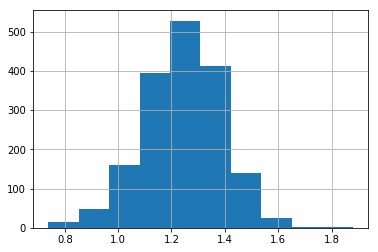

In [52]:
hist = b['IABA'].hist()
hist

In [65]:
import numpy as np, scipy.stats as st

st.t.interval(0.95, len(b['IABA'])-1, loc=np.mean(b['IABA']), scale=st.sem(b['IABA']))

(1.2348712596269367, 1.2487304481967183)

In [56]:
b['IABA'].var()

0.021575468042173224

In [57]:
b['IABA'].describe()

count    1726.000000
mean        1.241801
std         0.146886
min         0.738095
25%         1.151294
50%         1.252759
75%         1.343546
max         1.879245
Name: IABA, dtype: float64

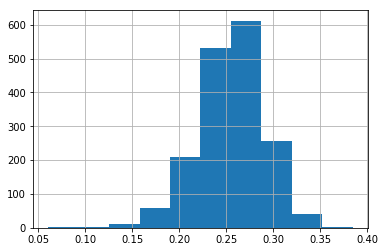

In [58]:
hist = b['BA'].hist()
hist